In [1]:
import re
import networkx as nx

In [3]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title') + " " + df.get('Description')
galexy_post_date = df.get('Post Date')

In [4]:
from eunjeon import Mecab
tagger = Mecab()
galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [5]:
galexy_nouns = []
nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            nouns.append(noun)
    galexy_nouns.append(nouns)

In [6]:
!pip install gensim

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import gensim
galexy_bigram = gensim.models.Phrases(galexy_nouns)
galexy_trigram = gensim.models.Phrases(galexy_bigram[galexy_nouns])
galexy_bigram_model = gensim.models.phrases.Phraser(galexy_bigram)
galexy_trigram_model = gensim.models.phrases.Phraser(galexy_trigram)

In [8]:
from gensim import corpora
galexy_bigram_document = [galexy_bigram_model[nouns] for nouns in galexy_nouns]
galexy_bigram_document[1]

['삼성',
 '더블',
 '갤럭시',
 '특징',
 '사전',
 '예약',
 '새벽',
 '삼성',
 '갤럭시',
 '언',
 '공개',
 '갤럭시',
 '폴드',
 '영상',
 '리뷰',
 '작성',
 '삼성전자',
 '미국',
 '캘리포니아',
 '개최',
 '갤럭시',
 '언',
 '갤럭시',
 '가칭',
 '삼성',
 '갤럭시',
 '폴드',
 '디자인',
 '스펙',
 '가격',
 '출시',
 '행사',
 '공개',
 '할여',
 '삼성',
 '갤럭시',
 '폴드',
 '디자인',
 '스펙',
 '가격',
 '출시',
 '세계',
 '최초',
 '뒤',
 '삼성전자',
 '고동진',
 '사장',
 '안쪽',
 '포켓',
 '갤럭시',
 '폴드',
 '실물',
 '퍼포먼스',
 '더블',
 '삼성',
 '갤럭시',
 '폴드',
 '화웨이',
 '메이트',
 '고화질',
 '이미지',
 '더블',
 '시대',
 '개막',
 '삼성',
 '갤럭시',
 '폴드',
 '화웨이',
 '메이트',
 '출시',
 '고화질',
 '이미지',
 '애플',
 '아이폰',
 '화웨이',
 '삼성전자',
 '갤럭시',
 '폴드',
 '우월_과시',
 '메이트',
 '발표',
 '화웨이',
 '일상',
 '삼성',
 '갤럭시',
 '팬',
 '큐레이터',
 '면접',
 '후기',
 '이번',
 '갤럭시',
 '출시',
 '삼성전자',
 '갤럭시',
 '팬',
 '대상',
 '대외',
 '활동',
 '갤럭시',
 '팬',
 '큐레이터',
 '모집',
 '예전',
 '유명',
 '갤럭시',
 '빠',
 '돌',
 '이번',
 '갤럭시',
 '팬',
 '큐레이터',
 '관심',
 '삼성',
 '갤럭시',
 '화면',
 '디스플레이',
 '한계',
 '경신',
 '삼성',
 '갤럭시',
 '시리즈',
 '탑재',
 '디스플레이',
 '그간',
 '삼성',
 '모바일',
 '패널',
 '갤럭시',
 '삼성',
 '갤럭시',
 '이전',
 '최고',
 '화질',
 '애플',
 '아이폰

In [9]:
galexy_id2word = corpora.Dictionary(galexy_bigram_document)
galexy_corpus = [galexy_id2word.doc2bow(doc) for doc in galexy_bigram_document]
galexy_corpus[0]

[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 141),
 (9, 1),
 (10, 1),
 (11, 46),
 (12, 3),
 (13, 1),
 (14, 1),
 (15, 3),
 (16, 16),
 (17, 1),
 (18, 14),
 (19, 2),
 (20, 2),
 (21, 2),
 (22, 49),
 (23, 2),
 (24, 5),
 (25, 1),
 (26, 3),
 (27, 1),
 (28, 4),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 3),
 (35, 1),
 (36, 5),
 (37, 5),
 (38, 1),
 (39, 2),
 (40, 3),
 (41, 1),
 (42, 1),
 (43, 5),
 (44, 24),
 (45, 1),
 (46, 1),
 (47, 9),
 (48, 3),
 (49, 1),
 (50, 26),
 (51, 1),
 (52, 1),
 (53, 8),
 (54, 24),
 (55, 10),
 (56, 12),
 (57, 1),
 (58, 5),
 (59, 3352),
 (60, 2),
 (61, 1),
 (62, 41),
 (63, 3),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 21),
 (70, 3),
 (71, 1),
 (72, 3),
 (73, 1),
 (74, 1),
 (75, 9),
 (76, 4),
 (77, 5),
 (78, 1),
 (79, 1),
 (80, 2),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 8),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 6),
 (89, 1),
 (90, 20),
 (91, 2),
 (92, 1),
 (93, 1),
 (94, 7),
 (95, 3),
 (96, 1),
 (97, 1),
 (98, 1),
 (9

In [10]:
from gensim.models import CoherenceModel

galexy_coherence_score=[]
for i in range(2,10):
    model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=galexy_bigram_document, dictionary=galexy_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,'\nCoherence Score: ', coherence_lda)
    galexy_coherence_score.append(coherence_lda)

n= 2 
Coherence Score:  0.2507410100444166
n= 3 
Coherence Score:  0.25170194816126495
n= 4 
Coherence Score:  0.24578221187242832
n= 5 
Coherence Score:  0.24913069180411923
n= 6 
Coherence Score:  0.24954164682568358
n= 7 
Coherence Score:  0.24079009889271127
n= 8 
Coherence Score:  0.2474082298137122
n= 9 
Coherence Score:  0.24905191998410578


In [11]:
import matplotlib.pyplot as plt
import numpy

k=[]
for i in range(2,10):
    k.append(i)

x=numpy.array(k)
y=numpy.array(galexy_coherence_score)
plt.title('Galexy Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-10)')
plt.ylabel('Cohrence Score')
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
galexy_model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=3)
galexy_model.print_topics()

[(0,
  '0.142*"갤럭시" + 0.110*"삼성" + 0.017*"스마트폰" + 0.015*"삼성전자" + 0.011*"폴드" + 0.011*"출시" + 0.010*"노트" + 0.009*"워치" + 0.008*"공개" + 0.008*"플러스"'),
 (1,
  '0.130*"갤럭시" + 0.087*"삼성" + 0.016*"스마트폰" + 0.015*"삼성전자" + 0.012*"출시" + 0.010*"공개" + 0.010*"카메라" + 0.009*"워치" + 0.009*"폴드" + 0.009*"더블"'),
 (2,
  '0.101*"갤럭시" + 0.084*"삼성" + 0.020*"스마트폰" + 0.014*"출시" + 0.014*"삼성전자" + 0.011*"폴드" + 0.010*"공개" + 0.009*"노트" + 0.008*"제품" + 0.008*"카메라"')]

In [13]:
!pip install pyLDAvis

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
prepared_data = gensimvis.prepare(galexy_model, galexy_corpus, galexy_id2word)
pyLDAvis.display(prepared_data)

c:\python\venv\tensorflow\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [15]:
galexy_nouns_date={}
for i in range(len(galexy_posts)):
    if galexy_post_date[i] in galexy_nouns_date:
        galexy_nouns_date[galexy_post_date[i]].append(galexy_nouns[i])
    else:
        galexy_nouns_date[galexy_post_date[i]]=[]
        galexy_nouns_date[galexy_post_date[i]].append(galexy_nouns[i])

galexy_nouns_date = sorted(galexy_nouns_date.items())
galexy_nouns_date[0]

(20150919,
 [['삼성',
   '더블',
   '갤럭시',
   '특징',
   '사전',
   '예약',
   '새벽',
   '삼성',
   '갤럭시',
   '언',
   '공개',
   '갤럭시',
   '폴드',
   '영상',
   '리뷰',
   '작성',
   '삼성전자',
   '미국',
   '캘리포니아',
   '개최',
   '갤럭시',
   '언',
   '갤럭시',
   '가칭',
   '삼성',
   '갤럭시',
   '폴드',
   '디자인',
   '스펙',
   '가격',
   '출시',
   '행사',
   '공개',
   '할여',
   '삼성',
   '갤럭시',
   '폴드',
   '디자인',
   '스펙',
   '가격',
   '출시',
   '세계',
   '최초',
   '뒤',
   '삼성전자',
   '고동진',
   '사장',
   '안쪽',
   '포켓',
   '갤럭시',
   '폴드',
   '실물',
   '퍼포먼스',
   '더블',
   '삼성',
   '갤럭시',
   '폴드',
   '화웨이',
   '메이트',
   '고화질',
   '이미지',
   '더블',
   '시대',
   '개막',
   '삼성',
   '갤럭시',
   '폴드',
   '화웨이',
   '메이트',
   '출시',
   '고화질',
   '이미지',
   '애플',
   '아이폰',
   '화웨이',
   '삼성전자',
   '갤럭시',
   '폴드',
   '우월',
   '과시',
   '메이트',
   '발표',
   '화웨이',
   '일상',
   '삼성',
   '갤럭시',
   '팬',
   '큐레이터',
   '면접',
   '후기',
   '이번',
   '갤럭시',
   '출시',
   '삼성전자',
   '갤럭시',
   '팬',
   '대상',
   '대외',
   '활동',
   '갤럭시',
   '팬',
   '큐레이터',
   '모집',
   '예전',
   '유명',
   

In [16]:
galexy_nouns_dates=[]
galexy_date_length=[]
for i in range(len(galexy_nouns_date)):
    galexy_nouns_dates.append(galexy_nouns_date[i][1])
    galexy_date_length.append(len(galexy_nouns_date[i][1]))

galexy_date_length[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
galexy_merged_dates=[]
for posts in galexy_nouns_dates:
    for post in posts:
        galexy_merged_dates=galexy_merged_dates+[post]

galexy_merged_dates[0]

['삼성',
 '더블',
 '갤럭시',
 '특징',
 '사전',
 '예약',
 '새벽',
 '삼성',
 '갤럭시',
 '언',
 '공개',
 '갤럭시',
 '폴드',
 '영상',
 '리뷰',
 '작성',
 '삼성전자',
 '미국',
 '캘리포니아',
 '개최',
 '갤럭시',
 '언',
 '갤럭시',
 '가칭',
 '삼성',
 '갤럭시',
 '폴드',
 '디자인',
 '스펙',
 '가격',
 '출시',
 '행사',
 '공개',
 '할여',
 '삼성',
 '갤럭시',
 '폴드',
 '디자인',
 '스펙',
 '가격',
 '출시',
 '세계',
 '최초',
 '뒤',
 '삼성전자',
 '고동진',
 '사장',
 '안쪽',
 '포켓',
 '갤럭시',
 '폴드',
 '실물',
 '퍼포먼스',
 '더블',
 '삼성',
 '갤럭시',
 '폴드',
 '화웨이',
 '메이트',
 '고화질',
 '이미지',
 '더블',
 '시대',
 '개막',
 '삼성',
 '갤럭시',
 '폴드',
 '화웨이',
 '메이트',
 '출시',
 '고화질',
 '이미지',
 '애플',
 '아이폰',
 '화웨이',
 '삼성전자',
 '갤럭시',
 '폴드',
 '우월',
 '과시',
 '메이트',
 '발표',
 '화웨이',
 '일상',
 '삼성',
 '갤럭시',
 '팬',
 '큐레이터',
 '면접',
 '후기',
 '이번',
 '갤럭시',
 '출시',
 '삼성전자',
 '갤럭시',
 '팬',
 '대상',
 '대외',
 '활동',
 '갤럭시',
 '팬',
 '큐레이터',
 '모집',
 '예전',
 '유명',
 '갤럭시',
 '빠',
 '돌',
 '이번',
 '갤럭시',
 '팬',
 '큐레이터',
 '관심',
 '삼성',
 '갤럭시',
 '화면',
 '디스플레이',
 '한계',
 '경신',
 '삼성',
 '갤럭시',
 '시리즈',
 '탑재',
 '디스플레이',
 '그간',
 '삼성',
 '모바일',
 '패널',
 '갤럭시',
 '삼성',
 '갤럭시',
 '이전',
 '최고',
 '화질',
 '애플',
 

In [18]:
import gensim
from gensim import corpora

def docLDA(nouns):
    bigram = gensim.models.Phrases(nouns)
    trigram = gensim.models.Phrases(bigram[nouns])
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    bigram_document = [bigram_mod[doc] for doc in nouns]
    id2word = corpora.Dictionary(bigram_document)

    corpus = [id2word.doc2bow(doc) for doc in bigram_document]
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=6)
    
    return model, corpus, id2word

In [19]:
galexy_model, galexy_corpus, galexy_id2word = docLDA(galexy_nouns)
galexy_model.print_topics()

[(0,
  '0.117*"갤럭시" + 0.086*"삼성" + 0.016*"스마트폰" + 0.016*"삼성전자" + 0.010*"출시" + 0.010*"폴드" + 0.010*"노트" + 0.009*"워치" + 0.008*"사용" + 0.008*"더블"'),
 (1,
  '0.098*"삼성" + 0.098*"갤럭시" + 0.020*"삼성전자" + 0.019*"스마트폰" + 0.011*"워치" + 0.010*"노트" + 0.010*"폴드" + 0.009*"출시" + 0.009*"모델" + 0.008*"더블"'),
 (2,
  '0.131*"갤럭시" + 0.082*"삼성" + 0.022*"스마트폰" + 0.016*"삼성전자" + 0.012*"출시" + 0.012*"공개" + 0.009*"노트" + 0.009*"워치" + 0.009*"모델" + 0.009*"폴드"'),
 (3,
  '0.126*"갤럭시" + 0.117*"삼성" + 0.017*"삼성전자" + 0.015*"스마트폰" + 0.012*"출시" + 0.011*"노트" + 0.011*"공개" + 0.011*"폴드" + 0.009*"워치" + 0.008*"사용"'),
 (4,
  '0.147*"갤럭시" + 0.101*"삼성" + 0.016*"스마트폰" + 0.014*"삼성전자" + 0.012*"폴드" + 0.011*"출시" + 0.010*"워치" + 0.010*"플러스" + 0.009*"사용" + 0.009*"노트"'),
 (5,
  '0.153*"갤럭시" + 0.103*"삼성" + 0.018*"스마트폰" + 0.015*"삼성전자" + 0.010*"출시" + 0.010*"폴드" + 0.007*"노트" + 0.007*"공개" + 0.007*"플러스" + 0.007*"카메라"')]

In [20]:
def getTopics(model):
    topics = []
    for topic in model.print_topics():
        i=1
        model_words=[]
        topic_words=str(topic).split('"')
        for words in topic_words:
            if i%2==0:
                model_words.append(words)
            i+=1
        topics.append(model_words)
    return topics

In [21]:
galexy_topics = getTopics(galexy_model)
galexy_topics

[['갤럭시', '삼성', '스마트폰', '삼성전자', '출시', '폴드', '노트', '워치', '사용', '더블'],
 ['삼성', '갤럭시', '삼성전자', '스마트폰', '워치', '노트', '폴드', '출시', '모델', '더블'],
 ['갤럭시', '삼성', '스마트폰', '삼성전자', '출시', '공개', '노트', '워치', '모델', '폴드'],
 ['갤럭시', '삼성', '삼성전자', '스마트폰', '출시', '노트', '공개', '폴드', '워치', '사용'],
 ['갤럭시', '삼성', '스마트폰', '삼성전자', '폴드', '출시', '워치', '플러스', '사용', '노트'],
 ['갤럭시', '삼성', '스마트폰', '삼성전자', '출시', '폴드', '노트', '공개', '플러스', '카메라']]

In [22]:
galexy_topic_size=[]
index=0
for post_len in galexy_date_length:
    topic_size=[]
    doc=[]
    for i in range(post_len):
        doc+=galexy_merged_dates[index]
        index+=1
    for model in galexy_topics:
        count=0
        for noun in doc:
            if noun in model:
                count+=1
        topic_size.append(count)
    galexy_topic_size.append(topic_size)

galexy_topic_size[0:10]

[[7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996],
 [7987, 7953, 7998, 8032, 8019, 7996]]

In [23]:
import numpy as np
galexy_topic_array=np.array(galexy_topic_size)
galexy_topic_array

array([[  7987,   7953,   7998,   8032,   8019,   7996],
       [  7987,   7953,   7998,   8032,   8019,   7996],
       [  7987,   7953,   7998,   8032,   8019,   7996],
       ...,
       [151753, 151107, 151962, 152608, 152361, 151924],
       [191688, 190872, 191952, 192768, 192456, 191904],
       [ 47922,  47718,  47988,  48192,  48114,  47976]])

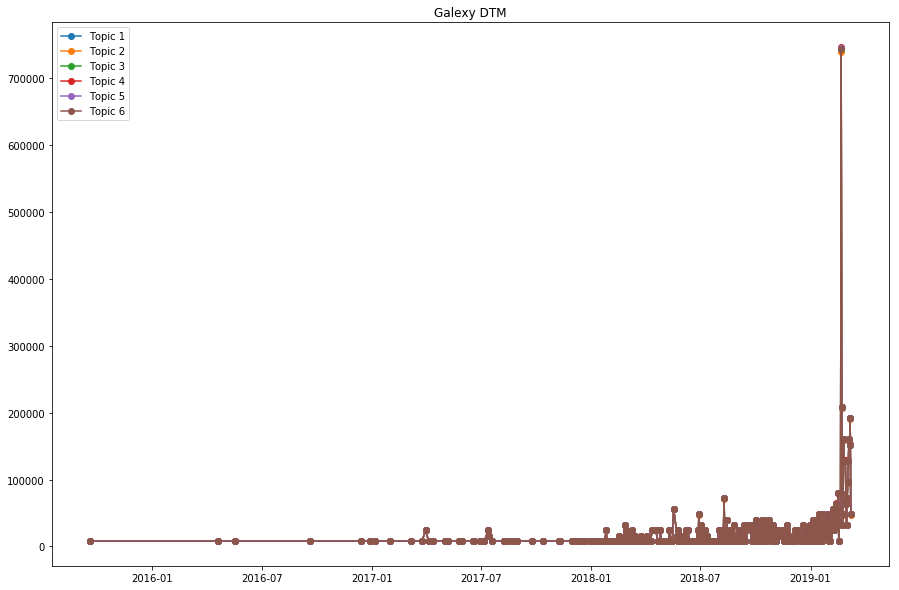

In [24]:
import matplotlib.pyplot as plt
import datetime as dt

galexy_x=[]
galexy_y=[]

galexy_topic_1=galexy_topic_array[:,0]
galexy_topic_2=galexy_topic_array[:,1]
galexy_topic_3=galexy_topic_array[:,2]
galexy_topic_4=galexy_topic_array[:,3]
galexy_topic_5=galexy_topic_array[:,4]
galexy_topic_6=galexy_topic_array[:,5]

galexy_unique_date=sorted(list(set(galexy_post_date)))
galexy_plt_data=[]
for date in galexy_unique_date:
    times= dt.datetime.strptime(str(date),'%Y%m%d')
    galexy_x.append(times)

plt.rcParams["figure.figsize"]=(15,10)
plt.title("Galexy DTM")
plt.plot(galexy_x, galexy_topic_1,'o-', label="Topic 1")
plt.plot(galexy_x, galexy_topic_2,'o-', label="Topic 2")
plt.plot(galexy_x, galexy_topic_3,'o-', label="Topic 3")
plt.plot(galexy_x, galexy_topic_4,'o-', label="Topic 4")
plt.plot(galexy_x, galexy_topic_5,'o-', label="Topic 5")
plt.plot(galexy_x, galexy_topic_6,'o-', label="Topic 6")
plt.legend()
plt.show()

In [25]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [26]:
galexy_word2vec = Word2Vec(galexy_nouns, min_count=1)
galexy_word2vec

In [27]:
galexy_word2vec.wv.most_similar("핸드폰")

[('개성', 0.31578129529953003),
 ('스마트폰', 0.2953914999961853),
 ('운동', 0.28244975209236145),
 ('부팅', 0.28028666973114014),
 ('광장', 0.2738276720046997),
 ('어려움', 0.2683213949203491),
 ('별도', 0.265413761138916),
 ('코', 0.2594553232192993),
 ('시북', 0.2517482042312622),
 ('소니', 0.2490161508321762)]

In [28]:
galexy_tsne = TSNE(n_components=2)
galexy_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [29]:
galexy_vocab = galexy_word2vec.wv.vocab
galexy_similarity = galexy_word2vec[galexy_vocab]
galexy_similarity

c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-4.0285811e+00,  1.2830573e+00, -1.7476067e-02, ...,
        -2.9277569e-01, -1.4951506e-01, -1.0093133e+00],
       [-3.4835618e+00,  2.4830438e-01, -2.7586858e+00, ...,
        -3.3529227e+00,  3.5098391e+00,  2.9700398e+00],
       [-4.9398131e+00,  1.2519186e+00, -1.0479683e+00, ...,
         2.1177112e-01, -2.4046042e+00, -6.7130560e-01],
       ...,
       [-2.5742175e-03, -2.1117022e-03, -1.6608789e-03, ...,
        -4.4683758e-03,  4.3073287e-03,  2.5744066e-03],
       [ 4.0572593e-03,  1.7184853e-03, -6.1412918e-04, ...,
        -3.5634106e-03,  4.7941944e-03,  4.5544710e-03],
       [-3.6666845e-03,  1.4976556e-03,  3.2140219e-03, ...,
         4.3143369e-03,  2.4530862e-04,  1.7780036e-05]], dtype=float32)

In [30]:
galexy_transform_similarity = galexy_tsne.fit_transform(galexy_similarity)
galexy_df = pd.DataFrame(galexy_transform_similarity, index=galexy_vocab, columns=['x', 'y'])
galexy_df[0:10]

,x,y
삼성,-20.187744,18.246498
더블,-46.875057,-0.837358
갤럭시,-20.437687,17.766668
특징,-21.512962,19.401102
사전,-21.806795,4.807207
예약,-4.930121,1.909131
새벽,-8.930931,-18.089098
언,-94.566833,-10.336372
공개,-47.495918,-0.424840
폴드,-47.347626,-0.628894


In [31]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc
# 한글 설정
font_path="./font/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

(-115.83320181651781,
 73.23753683849047,
 -117.23546787624065,
 73.46631809596722)

c:\python\venv\tensorflow\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


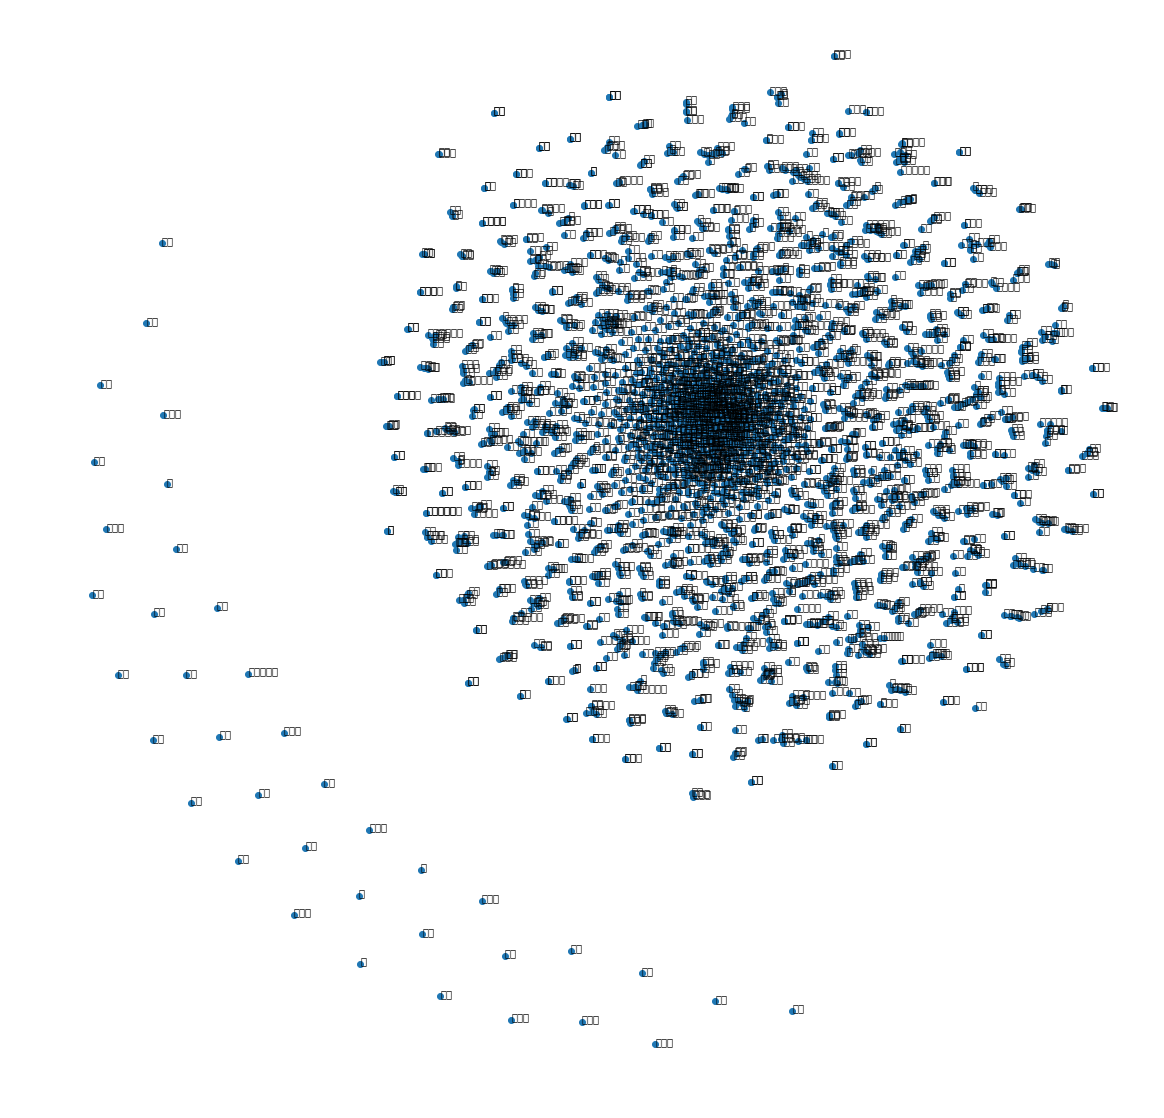

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(20, 20)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(galexy_df['x'], galexy_df['y'])
for word, pos in galexy_df.iterrows():
    ax.annotate(word, pos)
ax.axis("off")